In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

##Data Collection and Description

In [ ]:
df_test = pd.read_csv('SalaryData_Test.csv')

In [ ]:
df = pd.read_csv('SalaryData_Train.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
df['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [ ]:
df['Salary'] = [0 if x== ' <=50K' else 1 for x in df['Salary']]

In [ ]:
df_test['Salary'] = [0 if x== ' <=50K' else 1 for x in df_test['Salary']]

In [ ]:
df['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

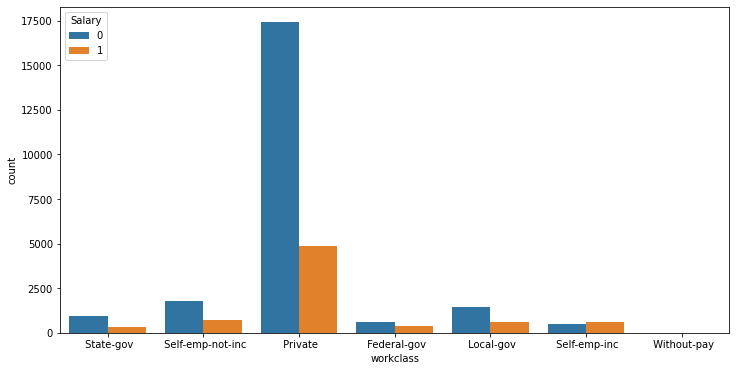

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(ax=ax, x=df['workclass'],hue=df['Salary']);

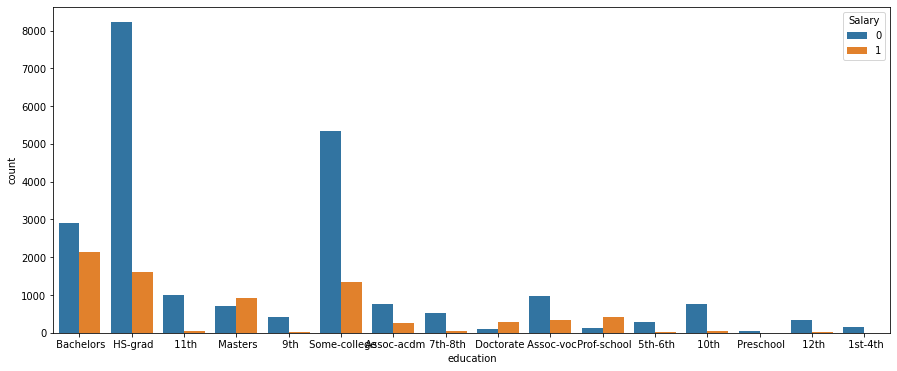

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=df['education'],hue=df['Salary']);

In [ ]:
df.drop('educationno',axis=1,inplace=True)

In [ ]:
df_test.drop('educationno',axis=1,inplace=True)

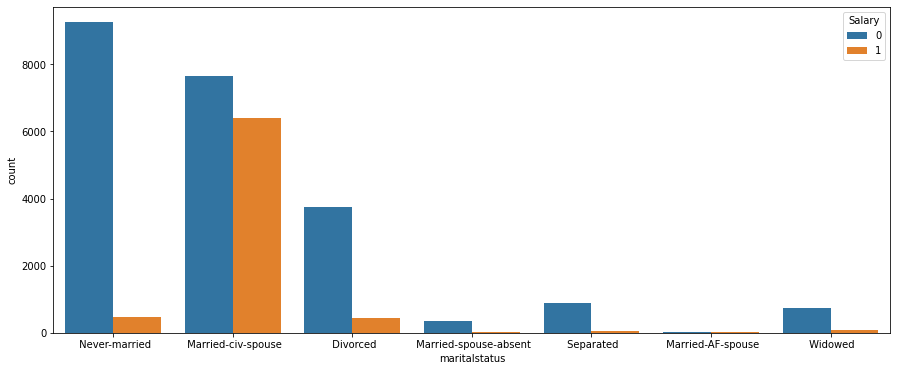

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=df['maritalstatus'],hue=df['Salary']);

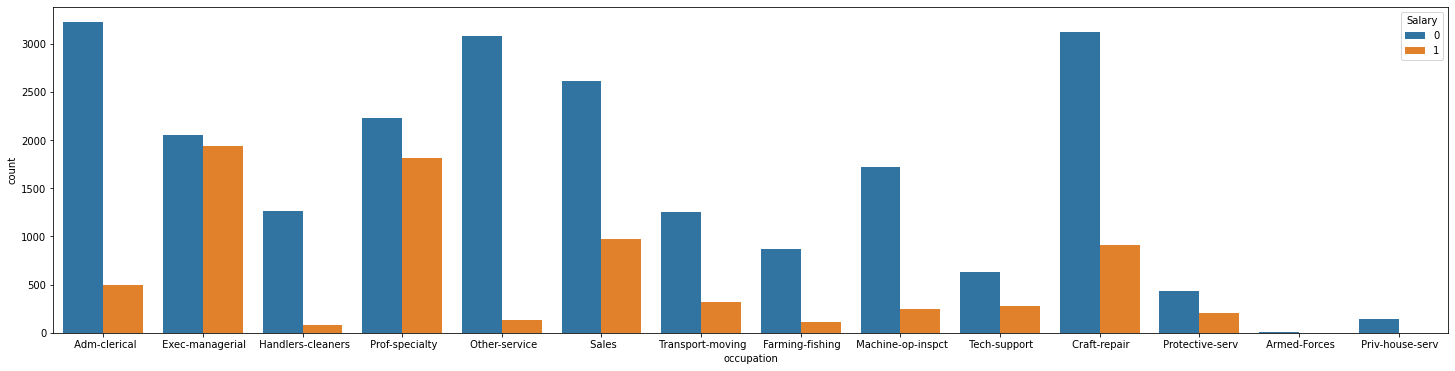

In [ ]:
fig, ax = plt.subplots(figsize=(25,6))
sns.countplot(x=df['occupation'],hue=df['Salary']);

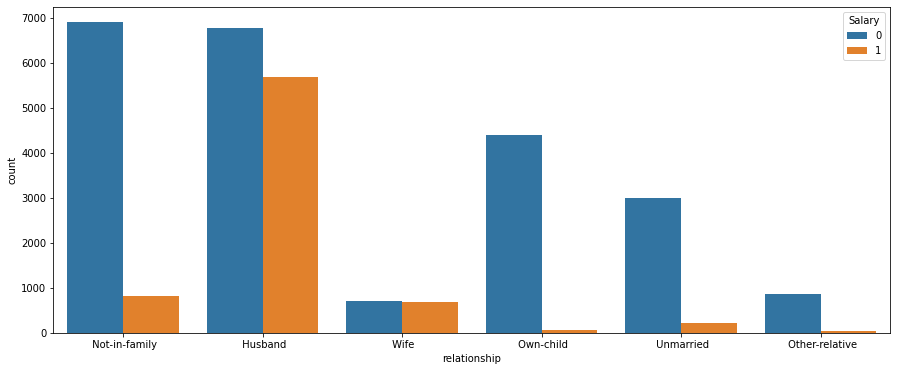

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=df['relationship'],hue=df['Salary']);

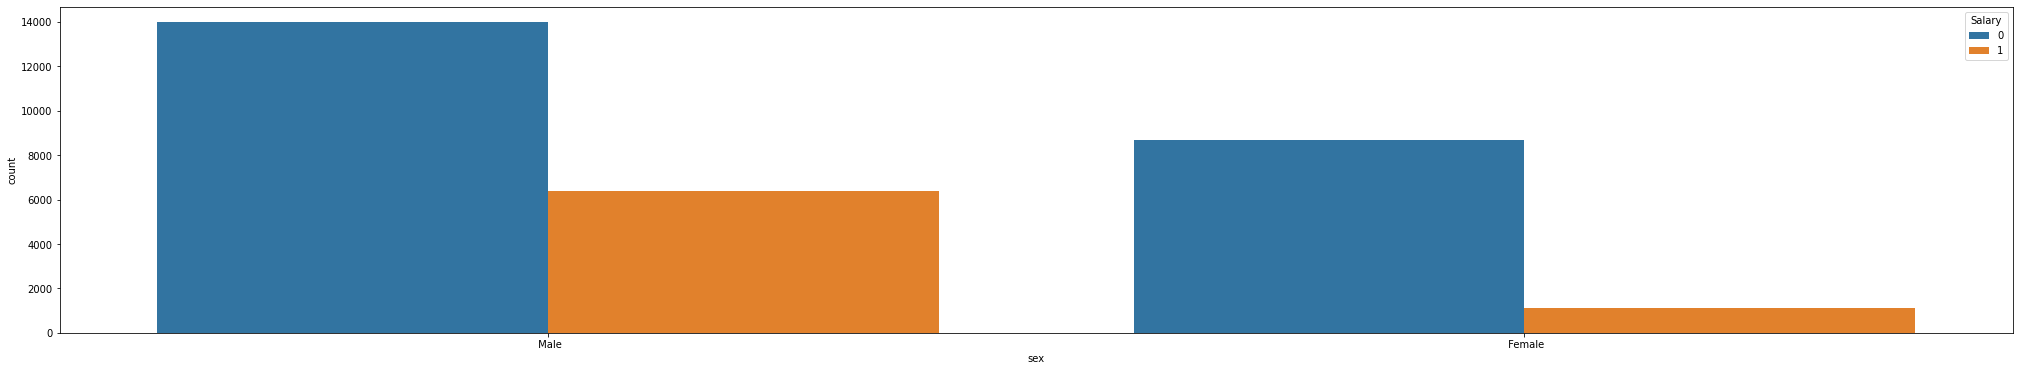

In [ ]:
fig, ax = plt.subplots(figsize=(35,6))
sns.countplot(x=df['sex'],hue=df['Salary']);

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df_test = pd.get_dummies(df_test,drop_first=True)

##Correlation

In [ ]:
df.corr()

,age,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,...,sex_ Male,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
age,1.000000,0.080152,0.060278,0.101598,0.241991,0.068252,-0.210483,0.111037,0.150425,0.014802,0.015336,-0.087748,-0.055033,0.033399,0.024005,0.096013,0.017575,-0.016301,-0.003107,0.006941,0.074257,0.010746,0.096389,0.008390,0.059847,-0.093458,-0.015618,0.308318,0.015821,-0.524000,0.013090,0.246885,-0.010807,0.016102,0.111362,0.039443,-0.104211,-0.014902,-0.092840,0.018901,...,0.081972,0.013973,0.013742,0.002959,0.029877,-0.003611,-0.004543,-0.016327,0.011472,0.003306,0.006249,0.018349,-0.020988,0.000311,-0.006235,-0.009892,0.017306,-0.001529,0.003967,-0.004254,0.029124,-0.010358,0.001265,-0.005046,-0.057495,-0.013855,0.000453,-0.006178,0.007942,0.010582,0.001061,0.007835,0.000024,0.001922,-0.007879,-0.004940,0.007867,0.016210,-0.017776,0.000657
capitalgain,0.080152,1.000000,-0.032218,0.080431,0.221195,-0.009625,-0.048182,0.096481,0.033322,-0.011585,-0.001758,-0.022411,-0.012556,-0.009368,-0.012223,-0.015693,-0.012328,-0.013485,-0.010193,0.038905,0.059680,-0.047227,0.047146,-0.000386,0.176063,-0.036118,-0.002653,0.084313,-0.006542,-0.065960,-0.012539,-0.011449,-0.002547,-0.023037,0.057654,-0.012414,-0.024372,-0.027376,-0.042434,-0.007459,...,0.048809,0.004210,-0.004415,-0.005251,-0.005324,0.002868,-0.002202,-0.003763,-0.001351,-0.002039,-0.001257,0.000804,-0.005297,-0.005506,-0.002942,-0.003702,-0.001053,0.019569,0.005048,-0.002925,-0.002796,-0.004254,0.008981,-0.002957,-0.014214,-0.003960,-0.003177,-0.004393,-0.000209,-0.004175,-0.003826,-0.006270,-0.002816,-0.002582,0.007639,-0.003502,-0.003603,0.012361,-0.002493,-0.002317
capitalloss,0.060278,-0.032218,1.000000,0.052454,0.150222,0.014781,-0.036497,0.031004,0.020282,-0.003726,-0.004709,-0.016791,-0.015427,-0.006062,-0.004077,-0.007492,-0.018168,0.002796,-0.009534,0.032893,0.049124,-0.030155,0.049370,-0.001238,0.048930,-0.022061,-0.005768,0.081568,-0.010572,-0.062040,-0.011977,-0.004442,0.005189,-0.001741,0.049215,-0.011349,-0.023613,-0.020165,-0.043935,-0.011264,...,0.047285,0.008657,0.012904,-0.006371,-0.002187,-0.007240,-0.006541,-0.010349,-0.000225,-0.006541,-0.000782,0.015902,-0.007133,-0.001064,0.003466,0.000979,0.002056,0.006111,0.003838,-0.000676,-0.006967,-0.011269,-0.003050,-0.005189,-0.022365,0.001273,-0.004709,-0.002085,0.003119,-0.005515,-0.007341,-0.004551,-0.004174,0.005688,0.005688,-0.005189,0.008857,0.015688,0.000352,-0.005034
hoursperweek,0.101598,0.080431,0.052454,1.000000,0.229480,0.001611,-0.095532,0.126254,0.087835,-0.032976,-0.01

In [ ]:
df.columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'Salary',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Married-AF-spouse',
       'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers

In [ ]:
df.drop(['maritalstatus_ Married-civ-spouse','maritalstatus_ Married-AF-spouse',
         'workclass_ Self-emp-not-inc','workclass_ Local-gov',
         'relationship_ Wife',
         'occupation_ Exec-managerial','occupation_ Prof-specialty'],axis=1,inplace=True)

In [ ]:
df_test.drop(['maritalstatus_ Married-civ-spouse','maritalstatus_ Married-AF-spouse',
         'workclass_ Self-emp-not-inc','workclass_ Local-gov',
         'relationship_ Wife',
         'occupation_ Exec-managerial','occupation_ Prof-specialty'],axis=1,inplace=True)

In [ ]:
df1 = pd.read_csv('SalaryData_Train.csv')

In [ ]:
df1['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [ ]:
df1['native_bin'] = [1 if x==' United-States' else 0 for x in df1['native']]

In [ ]:
sns.countplot(df1['native_bin'],hue=df1['Salary'])

In [ ]:
df.drop(['native_ China', 'native_ Columbia',
       'native_ Cuba', 'native_ Dominican-Republic', 'native_ Ecuador',
       'native_ El-Salvador', 'native_ England', 'native_ France',
       'native_ Germany', 'native_ Greece', 'native_ Guatemala',
       'native_ Haiti', 'native_ Honduras', 'native_ Hong', 'native_ Hungary',
       'native_ India', 'native_ Iran', 'native_ Ireland', 'native_ Italy',
       'native_ Jamaica', 'native_ Japan', 'native_ Laos', 'native_ Mexico',
       'native_ Nicaragua', 'native_ Outlying-US(Guam-USVI-etc)',
       'native_ Peru', 'native_ Philippines', 'native_ Poland',
       'native_ Portugal', 'native_ Puerto-Rico', 'native_ Scotland',
       'native_ South', 'native_ Taiwan', 'native_ Thailand',
       'native_ Trinadad&Tobago', 'native_ United-States', 'native_ Vietnam',
       'native_ Yugoslavia'],axis=1,inplace=True)

In [ ]:
df_test.drop(['native_ China', 'native_ Columbia',
       'native_ Cuba', 'native_ Dominican-Republic', 'native_ Ecuador',
       'native_ El-Salvador', 'native_ England', 'native_ France',
       'native_ Germany', 'native_ Greece', 'native_ Guatemala',
       'native_ Haiti', 'native_ Honduras', 'native_ Hong', 'native_ Hungary',
       'native_ India', 'native_ Iran', 'native_ Ireland', 'native_ Italy',
       'native_ Jamaica', 'native_ Japan', 'native_ Laos', 'native_ Mexico',
       'native_ Nicaragua', 'native_ Outlying-US(Guam-USVI-etc)',
       'native_ Peru', 'native_ Philippines', 'native_ Poland',
       'native_ Portugal', 'native_ Puerto-Rico', 'native_ Scotland',
       'native_ South', 'native_ Taiwan', 'native_ Thailand',
       'native_ Trinadad&Tobago', 'native_ United-States', 'native_ Vietnam',
       'native_ Yugoslavia'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'Salary',
       'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Married-spouse-absent',
       'maritalstatus_ Never-married', 'maritalstatus_ Separated',
       'maritalstatus_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'o

In [ ]:
df_test.columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'Salary',
       'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Married-spouse-absent',
       'maritalstatus_ Never-married', 'maritalstatus_ Separated',
       'maritalstatus_ Widowed', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'o

##Naive Bayes

In [ ]:
ros = RandomOverSampler()

In [ ]:
X  = df.drop('Salary',axis=1)
y = df['Salary']

In [ ]:
X_test = df_test.drop('Salary',axis=1)
y_test = df_test['Salary']

In [ ]:
X_ros,y_ros = ros.fit_resample(X,y)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_ros)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_ros)

GaussianNB()

In [ ]:
prediction = gnb.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[5018 6342]
 [ 221 3479]]
              precision    recall  f1-score   support

           0       0.96      0.44      0.60     11360
           1       0.35      0.94      0.51      3700

    accuracy                           0.56     15060
   macro avg       0.66      0.69      0.56     15060
weighted avg       0.81      0.56      0.58     15060

